In [1]:
import pandas as pd
data=pd.read_csv("datasets/silver.csv")
data.head()

,YEAR,GOLD RATE,SILVER RATE
0,2022,52950,55100
1,2021,50045,62572
2,2020,48651,63645
3,2019,35220,40600
4,2018,31438,41400


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x=np.array(data.iloc[:,:-1])
y=np.array(data.iloc[:,-1])
model=LinearRegression()
model.fit(x,y)
intercept=model.intercept_
coeffs=model.coef_
y_pred=model.predict(x)
mse=mean_squared_error(y,y_pred)
rmse= pow(mse,0.5)
print(f'silver rate = {coeffs[0]} * year + {coeffs[1]} * gold rate + {intercept}')
gold_in_2024=30668.86090006 #obtained form applying SLR to only gold and year
silver_in_2024= coeffs[0] * 2024 + coeffs[1] * gold_in_2024 + intercept
print(f'rate of silver in 2024 = {silver_in_2024/1000}')
print(f'RMSE = {rmse}')

silver rate = 202.9264262591664 * year + 1.131635985208045 * gold rate + -401303.58439805714
rate of silver in 2024 = 44.12548897034355
RMSE = 5283.588220757949


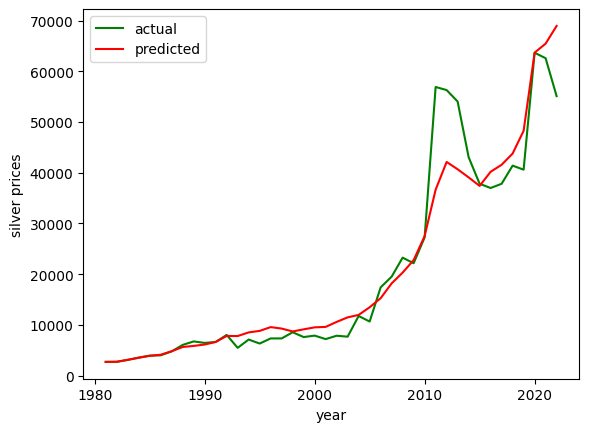

In [3]:
import matplotlib.pyplot as plt 
plt.plot(data['YEAR'],y,color='g')
plt.plot(data['YEAR'],y_pred,color='r')
plt.xlabel('year'), plt.ylabel('silver prices')
plt.legend(['actual','predicted'])
plt.show()

In [4]:
def MulitpleLinearRegression(X1,X2,Y):
    n=len(X1)
    x1=np.array(X1)
    x2=np.array(X2)
    y=np.array(Y)
    x1sqr=(x1**2).sum()
    x2sqr=(x2**2).sum()
    x1sum=x1.sum()
    x2sum=x2.sum()
    ysum=y.sum()
    x1y=(x1*y).sum()
    x2y=(x2*y).sum()
    x1x2=(x1*x2).sum()
    sigmax1sqr=x1sqr-(x1sum/n)**2
    sigmax2sqr=x2sqr-(x2sum/n)**2
    sigmax1x2=x1x2-(x1sum*x2sum)/n
    sigmax1y=x1y-(x1sum*ysum)/n
    sigmax2y=x2y-(x2sum*ysum)/n
    sigmax1x2=x1x2-(x1sum*x2sum)/n   
    b1=((sigmax1sqr*sigmax1y)-(sigmax1x2*sigmax2y))/((sigmax1sqr*sigmax2sqr)-(sigmax1x2)**2)
    b2=((sigmax2sqr*sigmax2y)-(sigmax1x2*sigmax1y))/((sigmax1sqr*sigmax2sqr)-(sigmax1x2)**2)
    b0= ysum - b1*x1sum -b2*x2sum
    return (b1,b2,b0)

In [5]:
b1,b2,b0=MulitpleLinearRegression(data['YEAR'],data['GOLD RATE'],data['SILVER RATE'])
print(f'silver rate = {b1} * year + {b2} * gold rate + {b0}')
gold_in_2024=30668.86090006 #obtained form applying SLR to only gold and year
silver_in_2024= b1 * 2024 + b2 * gold_in_2024 + intercept
print(f'rate of silver in 2024 = {silver_in_2024/1000}')

silver rate = -0.02647838489065656 * year + 69.84477663401273 * gold rate + -39492250.40006545
rate of silver in 2024 = 1740.702562535222
